In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import sys
import os
# Add the src folder to the system path
project_path = os.path.abspath('..')  # Adjust based on the actual project structure
src_path = os.path.join(project_path, 'src')
if src_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(src_path)

from data_cleaning import clean_data
from eda_utils import plot_distribution, plot_correlation, plot_sales_trends


In [4]:
logging.basicConfig(filename='../logs/eda.log', level=logging.INFO, 
                    format='%(asctime)s:%(levelname)s:%(message)s')
logger = logging.getLogger()
logger.info("EDA Notebook Started")


In [5]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')

logger.info("Datasets loaded successfully")
display(train.head(), test.head(), store.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_25192\3745133485.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
logger.info("Checking for missing values and data types")
print(train.info(), "\n")
print(store.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2  

In [8]:
import sys
import os
# Add the src folder to the system path
project_path = os.path.abspath('..')  # Adjust based on the actual project structure
src_path = os.path.join(project_path, 'src')
if src_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(src_path)
from data_cleaning import clean_data

cleaned_train, cleaned_store = clean_data(train, store)
logger.info("Data cleaned successfully")

display(cleaned_train.head(), cleaned_store.head())


c:\Users\hp\Rossmann_Sales_Forecasting\src\data_cleaning.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)
c:\Users\hp\Rossmann_Sales_Forecasting\src\data_cleaning.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionAge
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,196.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",206.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",217.0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,184.0
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,117.0


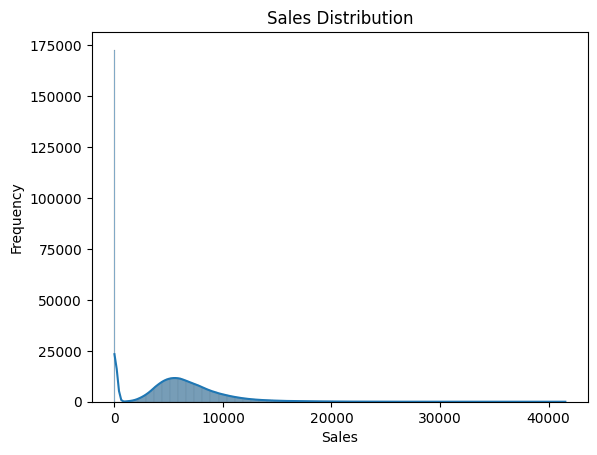

In [9]:
sns.histplot(cleaned_train['Sales'], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()
logger.info("Plotted overall sales distribution")


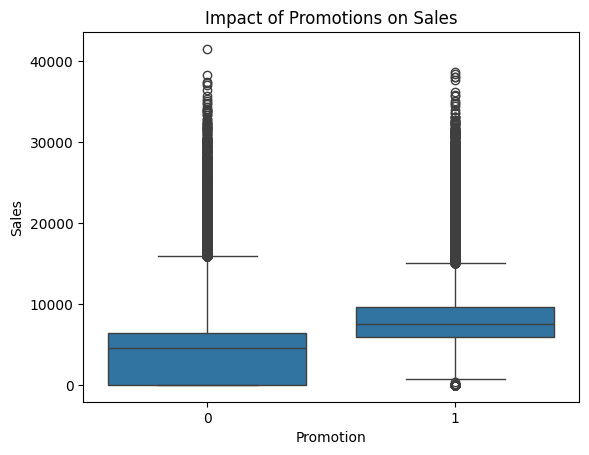

In [10]:
sns.boxplot(x='Promo', y='Sales', data=cleaned_train)
plt.title("Impact of Promotions on Sales")
plt.xlabel("Promotion")
plt.ylabel("Sales")
plt.show()
logger.info("Promotion analysis complete")


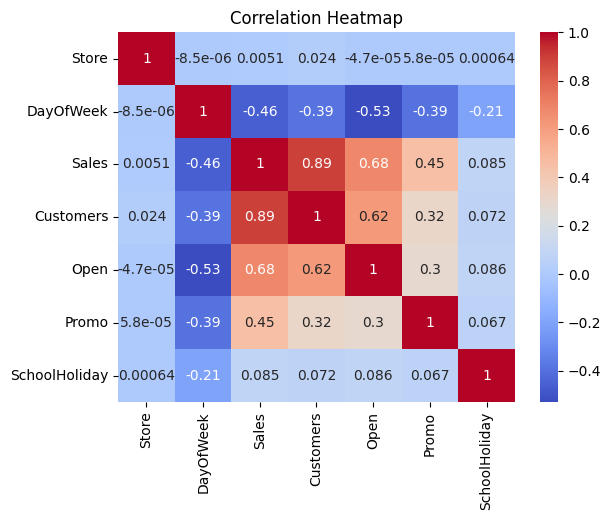

In [12]:
# Select only numeric columns for correlation
numeric_columns = cleaned_train.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

logger.info("Correlation heatmap plotted successfully")


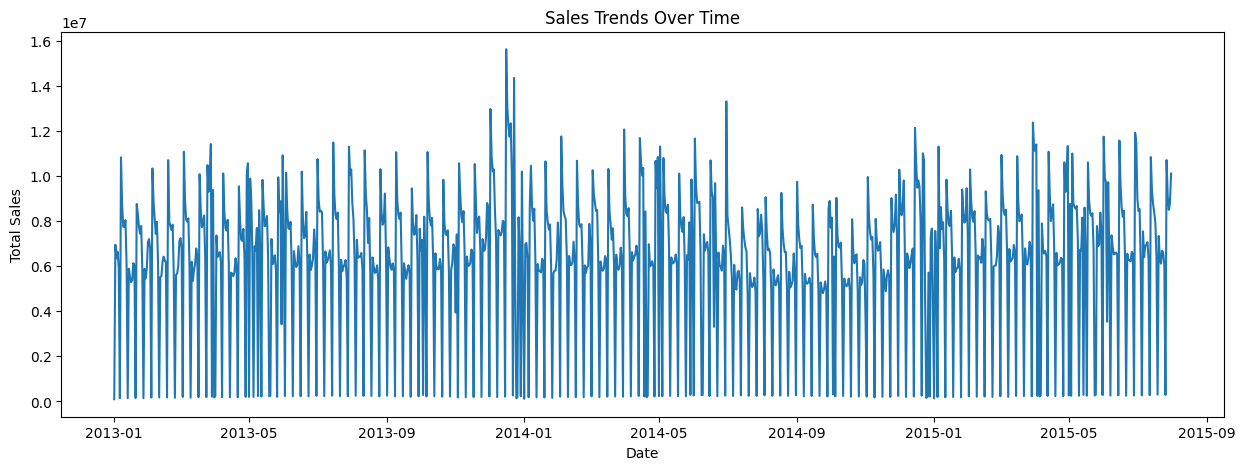

In [13]:
cleaned_train['Date'] = pd.to_datetime(cleaned_train['Date'])
sales_trends = cleaned_train.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='Sales', data=sales_trends)
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()
logger.info("Time series analysis complete")


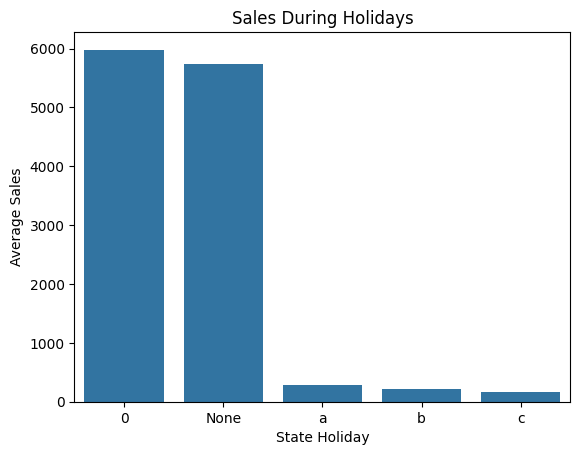

In [18]:
def holiday_analysis(df):
    """Analyze sales around holidays."""
    holiday_sales = df.groupby('StateHoliday')['Sales'].mean().reset_index()
    sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
    plt.title("Sales During Holidays")
    plt.xlabel("State Holiday")
    plt.ylabel("Average Sales")
    plt.show()
holiday_analysis(cleaned_train)
logger.info("Holiday analysis completed")


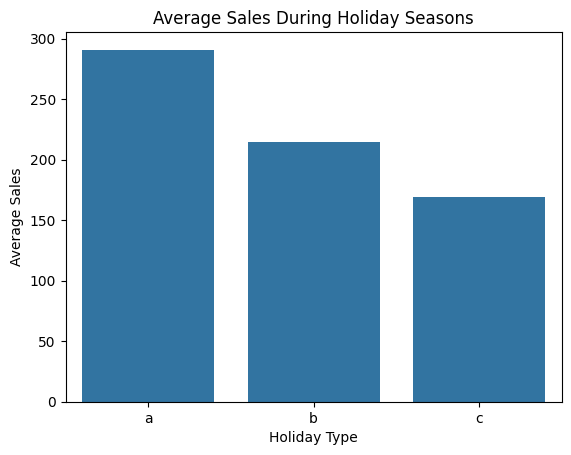

In [25]:
# Holiday Season Trends (Christmas and Easter)
def holiday_trends_analysis(df):
    """Analyze holiday season trends (Christmas and Easter)."""
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month

    holiday_sales = df[df['StateHoliday'].isin(['a', 'b', 'c'])].groupby('StateHoliday')['Sales'].mean().reset_index()
    sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
    plt.title("Average Sales During Holiday Seasons")
    plt.xlabel("Holiday Type")
    plt.ylabel("Average Sales")
    plt.show()

holiday_trends_analysis(cleaned_train)
logger.info("Holiday trends analysis completed")

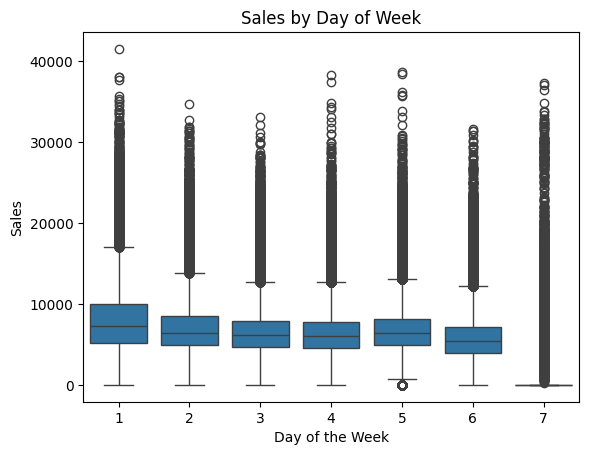

In [19]:
def store_operation_analysis(df):
    """Analyze store operation patterns."""
    sns.boxplot(x='DayOfWeek', y='Sales', data=df)
    plt.title("Sales by Day of Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Sales")
    plt.show()
store_operation_analysis(cleaned_train)
logger.info("Store operation analysis completed")


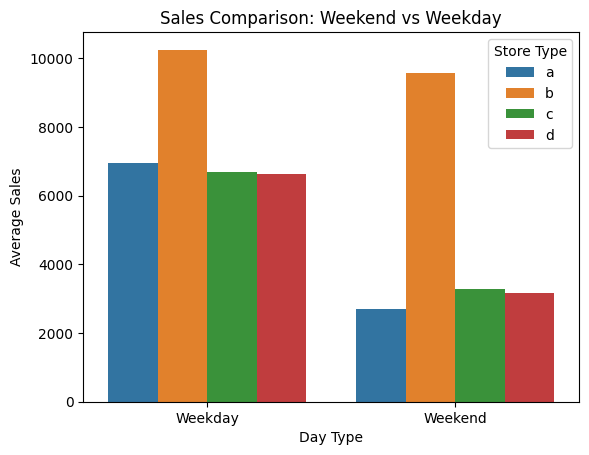

In [26]:
# Weekend vs Weekday Sales Comparison
def weekend_vs_weekday_analysis(df, store_df):
    """Compare weekend vs weekday sales for different store types."""
    merged = pd.merge(df, store_df, on='Store', how='left')
    merged['Weekday'] = merged['DayOfWeek'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')
    sales_comparison = merged.groupby(['Weekday', 'StoreType'])['Sales'].mean().reset_index()
    sns.barplot(x='Weekday', y='Sales', hue='StoreType', data=sales_comparison)
    plt.title("Sales Comparison: Weekend vs Weekday")
    plt.xlabel("Day Type")
    plt.ylabel("Average Sales")
    plt.legend(title="Store Type")
    plt.show()
weekend_vs_weekday_analysis(cleaned_train, cleaned_store)
logger.info("Weekend vs Weekday sales analysis completed")

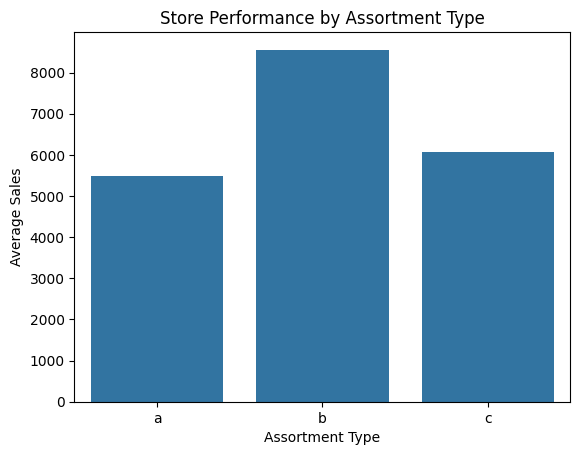

In [27]:
# Store Performance by Assortment Type
def assortment_analysis(df, store_df):
    """Analyze store performance by assortment type."""
    merged = pd.merge(df, store_df, on='Store', how='left')
    assortment_sales = merged.groupby('Assortment')['Sales'].mean().reset_index()
    sns.barplot(x='Assortment', y='Sales', data=assortment_sales)
    plt.title("Store Performance by Assortment Type")
    plt.xlabel("Assortment Type")
    plt.ylabel("Average Sales")
    plt.show()
assortment_analysis(cleaned_train, cleaned_store)
logger.info("Store performance by assortment type analyzed")

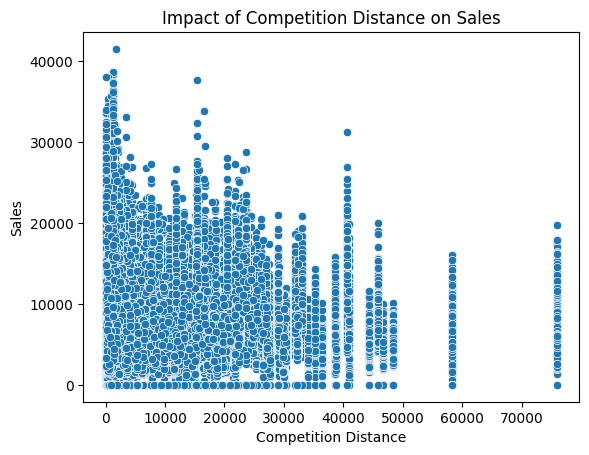

In [21]:
def competition_analysis(df, store_df):
    """Analyze impact of competition on sales."""
    merged = pd.merge(df, store_df, on='Store', how='left')
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged)
    plt.title("Impact of Competition Distance on Sales")
    plt.xlabel("Competition Distance")
    plt.ylabel("Sales")
    plt.show()
competition_analysis(cleaned_train, cleaned_store)
logger.info("Competition analysis completed")


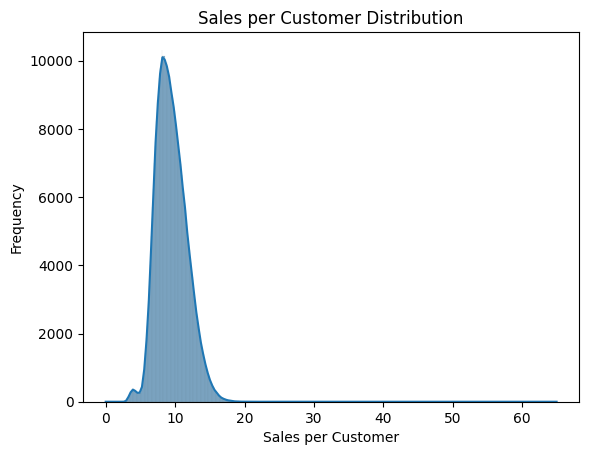

In [22]:
def customer_behavior_analysis(df):
    """Analyze customer behavior in relation to sales."""
    df['SalesPerCustomer'] = df['Sales'] / df['Customers']
    sns.histplot(df['SalesPerCustomer'], kde=True)
    plt.title("Sales per Customer Distribution")
    plt.xlabel("Sales per Customer")
    plt.ylabel("Frequency")
    plt.show()
customer_behavior_analysis(cleaned_train)
logger.info("Customer behavior analysis completed")


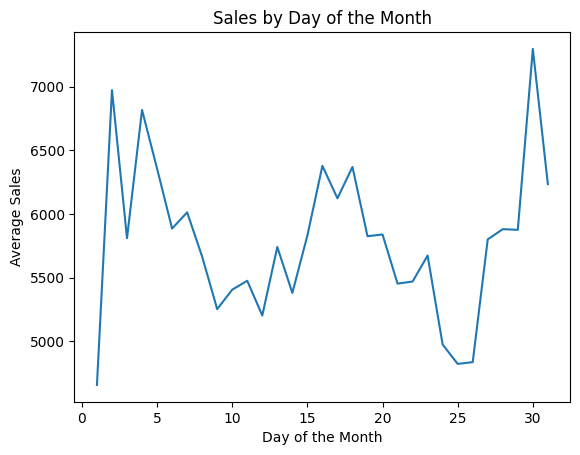

In [28]:
# Customer Behavior During the Month
def monthly_behavior_analysis(df):
    """Analyze customer behavior during different times of the month."""
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day

    sales_by_day = df.groupby('Day')['Sales'].mean().reset_index()
    sns.lineplot(x='Day', y='Sales', data=sales_by_day)
    plt.title("Sales by Day of the Month")
    plt.xlabel("Day of the Month")
    plt.ylabel("Average Sales")
    plt.show()
monthly_behavior_analysis(cleaned_train)
logger.info("Monthly customer behavior analysis completed")

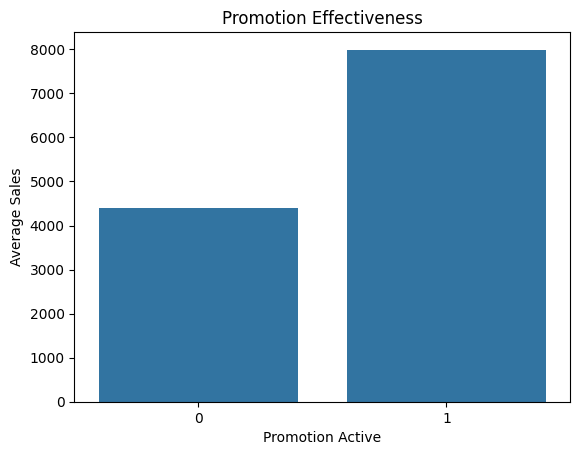

In [29]:
# Promotion Effectiveness
def promotion_effectiveness_analysis(df):
    """Calculate promotion effectiveness overall."""
    promo_sales = df.groupby('Promo')['Sales'].mean().reset_index()
    sns.barplot(x='Promo', y='Sales', data=promo_sales)
    plt.title("Promotion Effectiveness")
    plt.xlabel("Promotion Active")
    plt.ylabel("Average Sales")
    plt.show()
promotion_effectiveness_analysis(cleaned_train)
logger.info("Promotion effectiveness analysis completed")

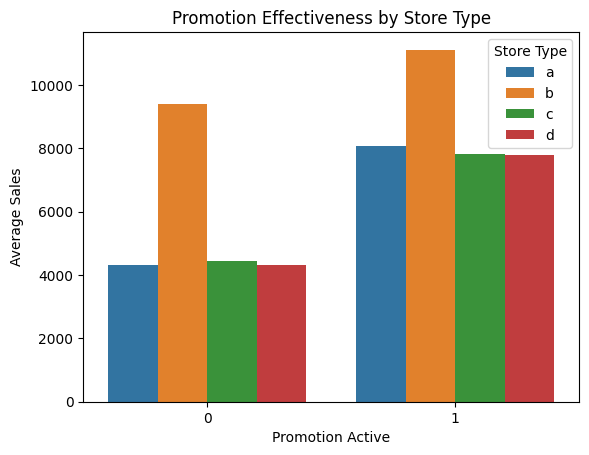

In [30]:
# Promotion Effectiveness by Store Type
def promotion_effectiveness_by_store_type(df, store_df):
    """Calculate promotion effectiveness by store type."""
    merged = pd.merge(df, store_df, on='Store', how='left')
    promo_effectiveness = merged.groupby(['Promo', 'StoreType'])['Sales'].mean().reset_index()
    sns.barplot(x='Promo', y='Sales', hue='StoreType', data=promo_effectiveness)
    plt.title("Promotion Effectiveness by Store Type")
    plt.xlabel("Promotion Active")
    plt.ylabel("Average Sales")
    plt.legend(title="Store Type")
    plt.show()
promotion_effectiveness_by_store_type(cleaned_train, cleaned_store)
logger.info("Promotion effectiveness by store type analysis completed")

In [31]:
# Basic Sales Statistics
def basic_sales_statistics(df):
    """Calculate basic sales statistics."""
    print("\n--- Basic Sales Statistics ---\n")
    print(f"Total Sales: {df['Sales'].sum()}")
    print(f"Average Sales: {df['Sales'].mean()}")
    print(f"Median Sales: {df['Sales'].median()}")
    print(f"Standard Deviation of Sales: {df['Sales'].std()}")
basic_sales_statistics(cleaned_train)
logger.info("Basic sales statistics calculated")



--- Basic Sales Statistics ---

Total Sales: 5873180623
Average Sales: 5773.818972305593
Median Sales: 5744.0
Standard Deviation of Sales: 3849.92617523476
